In [5]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (15, 15)})

# Seed random number generator

import random
from numpy import random as nprand
seed = hash('Lê Ngọc Khả Nhi') % 2**32
nprand.seed(seed)
random.seed(seed)

# Import networkx
import networkx as nx

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('VNcovid.csv', header = None, sep=';')

df

,0,1
0,From,To
1,1,6
2,2,6
3,3,NaN
4,4,NaN
...,...,...
262,235,NaN
263,236,NaN
264,237,NaN
265,238,NaN


In [3]:
G = nx.DiGraph()

edges = []

for i in df.index[1:]:
    G.add_node(int(df.iloc[i][0]))
    if df.iloc[i][1] is not np.nan:
        edges.append((int(df.iloc[i][0]), int(df.iloc[i][1])))

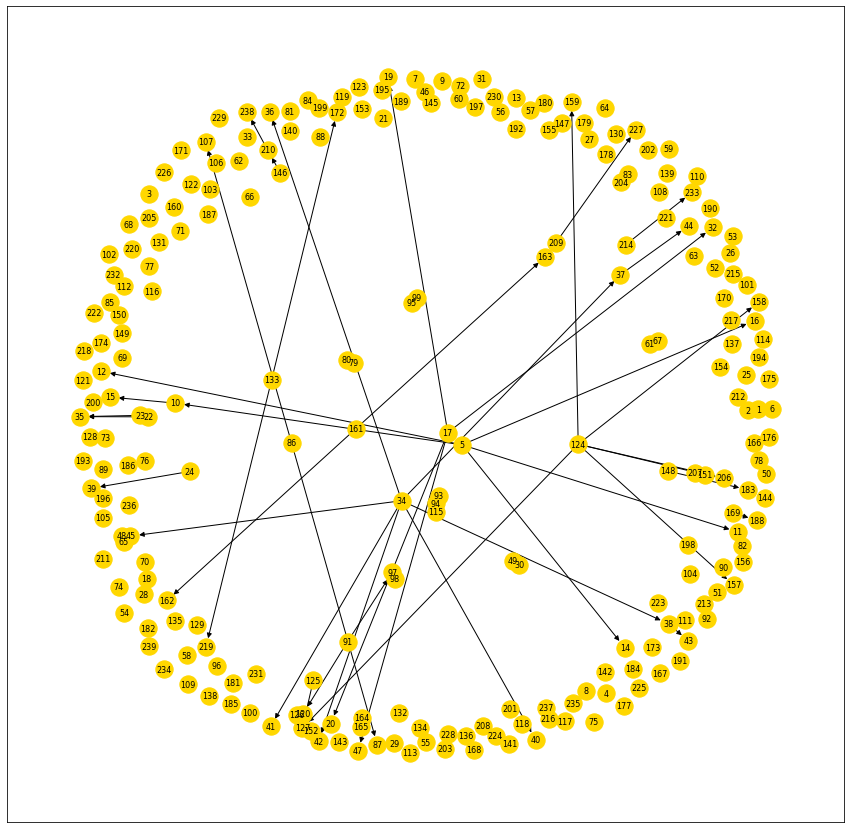

In [6]:
for pair in edges:
    G.add_edge(pair[0], pair[1])

nx.draw_networkx(G, node_size  = 300, 
                 node_color = 'gold', 
                 font_color = 'black', 
                 font_size =8)

In [7]:
len(G.nodes)

239

In [8]:
len(G.edges)

78

In [9]:
for n in G.nodes():
    G.nodes[n]['degree'] = int(len(list(G.neighbors(n))))

In [10]:
node_color = [
    '#ff73ad' if G.nodes[v]["degree"] >= 2
    else 'gold' for v in G]

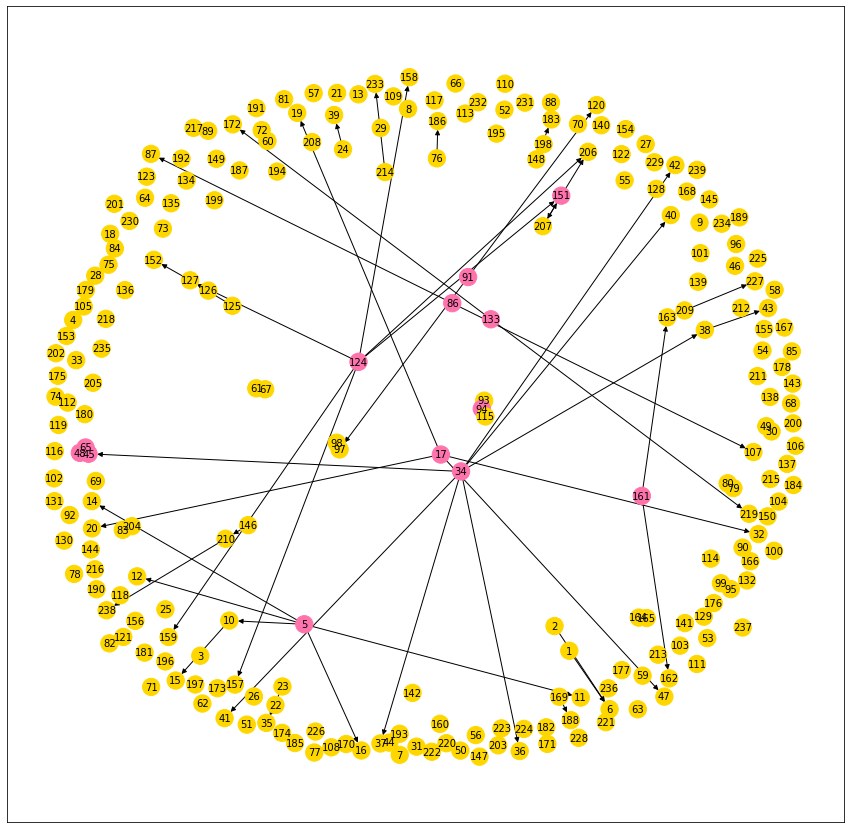

In [11]:
nx.draw_networkx(G, node_size  = 300, 
                 node_color = node_color, 
                 font_color = 'black', 
                 font_size =10)

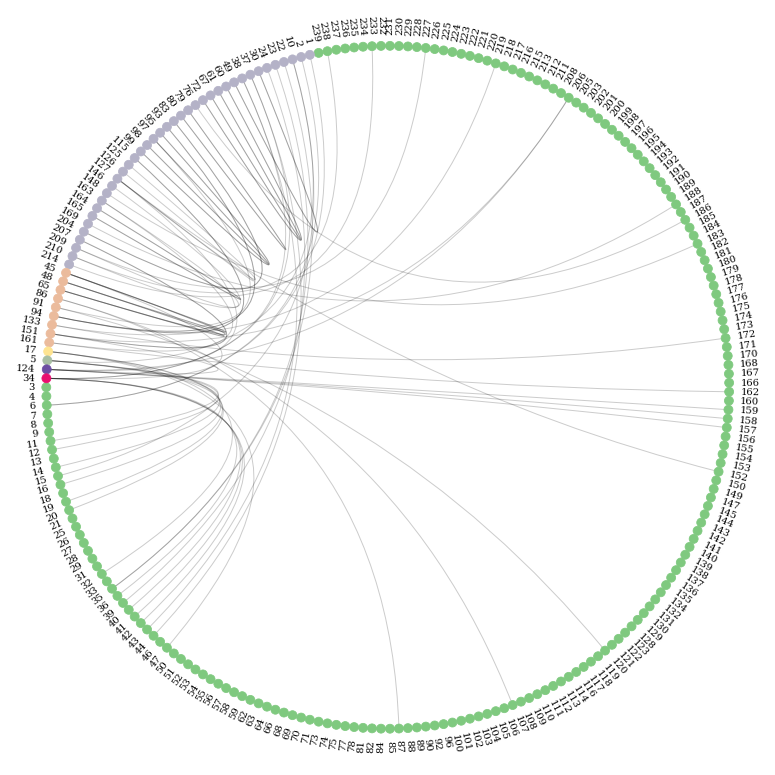

In [13]:
from nxviz import CircosPlot

c = CircosPlot(G, node_grouping='degree', 
               node_color='degree',
               node_labels=True,
               node_label_layout='rotation',
               figsize=(14,14))

c.draw()